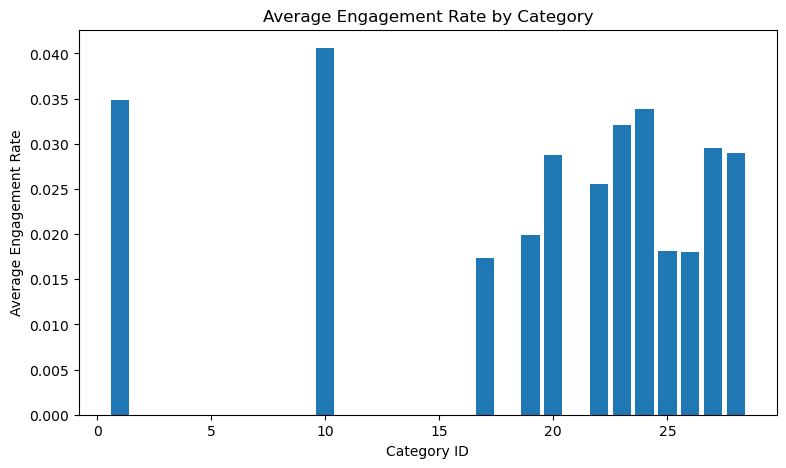

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("projectdb.db")

df_cat_eng = pd.read_sql("""
SELECT * 
FROM v_category_engagement
ORDER BY avg_engagement DESC
""", conn)

plt.figure(figsize=(9, 5))
plt.bar(df_cat_eng['category_id'], df_cat_eng['avg_engagement'])
plt.xlabel("Category ID")
plt.ylabel("Average Engagement Rate")
plt.title("Average Engagement Rate by Category")
plt.show()

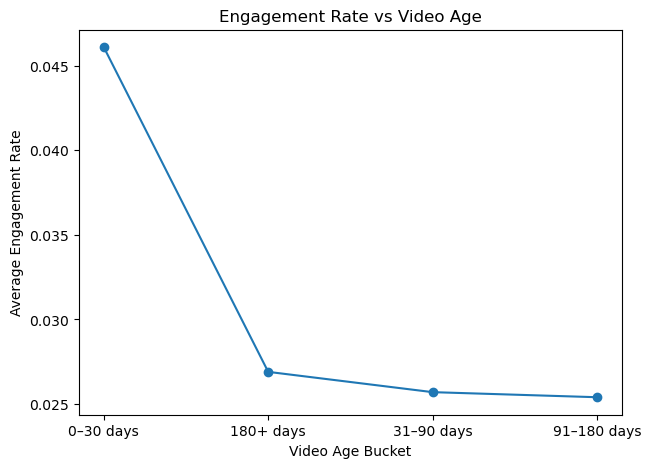

In [2]:
df_age = pd.read_sql("SELECT * FROM v_age_engagement", conn)

plt.figure(figsize=(7, 5))
plt.plot(df_age['age_bucket'], df_age['avg_engagement'], marker='o')
plt.xlabel("Video Age Bucket")
plt.ylabel("Average Engagement Rate")
plt.title("Engagement Rate vs Video Age")
plt.show()


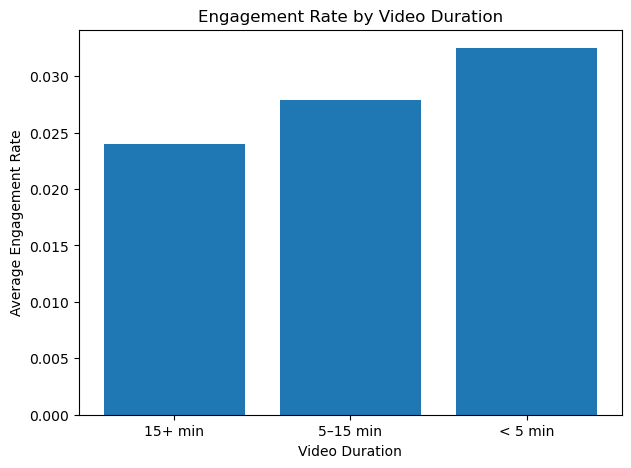

In [3]:
df_duration = pd.read_sql("SELECT * FROM v_duration_engagement", conn)

plt.figure(figsize=(7, 5))
plt.bar(df_duration['duration_bucket'], df_duration['avg_engagement'])
plt.xlabel("Video Duration")
plt.ylabel("Average Engagement Rate")
plt.title("Engagement Rate by Video Duration")
plt.show()


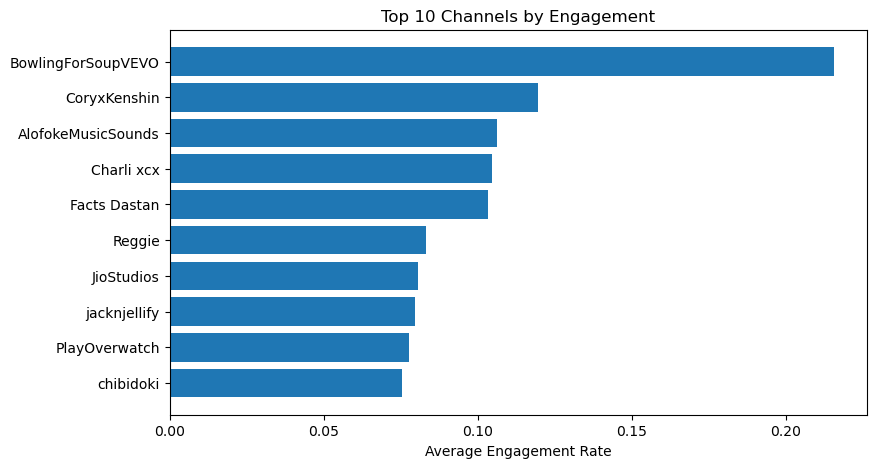

In [4]:
df_channel = pd.read_sql("""
SELECT * FROM v_channel_performance
ORDER BY avg_engagement DESC
LIMIT 10
""", conn)

plt.figure(figsize=(9, 5))
plt.barh(df_channel['channel_title'], df_channel['avg_engagement'])
plt.xlabel("Average Engagement Rate")
plt.title("Top 10 Channels by Engagement")
plt.gca().invert_yaxis()
plt.show()


In [5]:
views = {
    "dataset_overview": "SELECT * FROM v_dataset_overview",
    "category_distribution": "SELECT * FROM v_category_distribution",
    "category_engagement": "SELECT * FROM v_category_engagement",
    "channel_performance": "SELECT * FROM v_channel_performance",
    "age_engagement": "SELECT * FROM v_age_engagement",
    "duration_engagement": "SELECT * FROM v_duration_engagement"
}

for name, query in views.items():
    df = pd.read_sql(query, conn)
    df.to_csv(f"{name}.csv", index=False)

conn.close()


In [6]:
import sqlite3
import pandas as pd
import os

conn = sqlite3.connect("projectdb.db")

output_dir = r"C:\sqlite\exports"
os.makedirs(output_dir, exist_ok=True)

views = {
    "dataset_overview": "SELECT * FROM v_dataset_overview",
    "category_distribution": "SELECT * FROM v_category_distribution",
    "category_engagement": "SELECT * FROM v_category_engagement",
    "channel_performance": "SELECT * FROM v_channel_performance",
    "age_engagement": "SELECT * FROM v_age_engagement",
    "duration_engagement": "SELECT * FROM v_duration_engagement"
}

for name, query in views.items():
    df = pd.read_sql(query, conn)
    file_path = os.path.join(output_dir, f"{name}.csv")
    df.to_csv(file_path, index=False)
    print(f"Saved: {file_path}")

conn.close()


Saved: C:\sqlite\exports\dataset_overview.csv
Saved: C:\sqlite\exports\category_distribution.csv
Saved: C:\sqlite\exports\category_engagement.csv
Saved: C:\sqlite\exports\channel_performance.csv
Saved: C:\sqlite\exports\age_engagement.csv
Saved: C:\sqlite\exports\duration_engagement.csv
